** CHARGEMENT DES PACKAGES **

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline

** CHARGEMENT DES DONNEES D'ETUDE **

In [2]:
digits = load_digits()
X = digits.data
y = digits.target

In [5]:
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


** VISUALISATION DES DONNEES EN IMAGES **

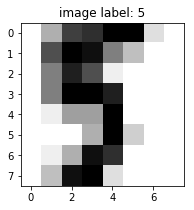

In [6]:
sample_index = 15
plt.figure(figsize=(3, 3))
plt.imshow(digits.images[sample_index], cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("image label: %d" % digits.target[sample_index])

** PREPARATION DES DONNEES **

Dans cette partie, nous allons normaliser les données puis diviser nos données en train et test dataset

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=37)
scaler = preprocessing.StandardScaler()
X_train1 = scaler.fit_transform(X_train)
X_test1 = scaler.transform(X_test)

In [10]:
print(X_train1.shape,y_train.shape)
print(X_test1.shape,y_test.shape)

(1527, 64) (1527,)
(270, 64) (270,)


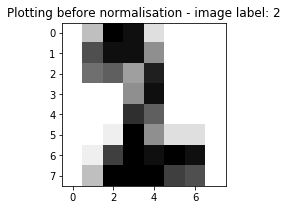

In [13]:
sample_index = 15
plt.figure(figsize=(3, 3))
plt.imshow(scaler.inverse_transform(X_train1[sample_index]).reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("Plotting before normalisation - image label: %d" % y_train[sample_index])

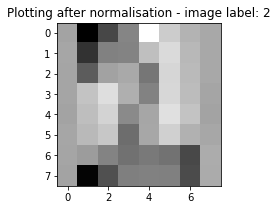

In [12]:
sample_index = 15
plt.figure(figsize=(3, 3))
plt.imshow(X_train1[sample_index].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("Plotting after normalisation - image label: %d" % y_train[sample_index])

** STEP1: CONSTRUCTION D'UNE ARCHITECTURE DE DEEP LEARNING AVEC KERAS **

In [14]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras import optimizers

Using TensorFlow backend.


In [17]:
### Convertir la variable target en one_hot encoding
import keras
from keras.utils.np_utils import to_categorical

y_train1 = to_categorical(y_train)
y_train1[:3]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

In [22]:
## Definition des dimensions de l'architecture: dimension de l'input, de l'output puis des layers
input_shape = X_train1.shape[1]
output_shape = y_train1.shape[1] #L'output de chaque sample est un vecteur constitué des proba d'occurence de chacune des classes (10 chiffres)
H = 100
## Definition de la sequence de l'architecture
model = Sequential()
model.add(Dense(H,input_dim=input_shape))
model.add(Activation('tanh'))
model.add(Dense(output_shape))
model.add(Activation('softmax'))

model.compile(optimizer=optimizers.SGD(lr=0.1),loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train1, y_train1, epochs=15, batch_size=32)
## Une epoch est quand toute la base de donnees est passée par le reseau de neurones (forward and back propagation)

Epoch 1/15
1527/1527 [==============================] - 1s 383us/step - loss: 0.7985 - acc: 0.8166
Epoch 2/15
1527/1527 [==============================] - 0s 56us/step - loss: 0.2778 - acc: 0.9483
Epoch 3/15
1527/1527 [==============================] - 0s 57us/step - loss: 0.1918 - acc: 0.9620
Epoch 4/15
1527/1527 [==============================] - 0s 58us/step - loss: 0.1515 - acc: 0.9712

** IMPACT OF PARAMETERS **

- LEARNING RATE

In [26]:
lst = list(np.arange(0,0.11,0.01))
lst

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]

In [31]:
## Decrease the learning rate by 10 or 100
lst_val = list(np.arange(0,0.11,0.01))
val_loss,val_acc = {},{}
for learning_rate in lst_val:
    model.compile(optimizer=optimizers.SGD(lr=learning_rate),loss='categorical_crossentropy', metrics=['accuracy'])
    history_callback = model.fit(X_train1, y_train1, epochs=15, batch_size=32)
    val_loss[learning_rate] = history_callback.history["loss"]
    val_acc[learning_rate] = history_callback.history["acc"]

Epoch 1/15
1527/1527 [==============================] - 1s 465us/step - loss: 0.0044 - acc: 1.0000
Epoch 2/15
1527/1527 [==============================] - 0s 62us/step - loss: 0.0044 - acc: 1.0000
Epoch 3/15
1527/1527 [==============================] - 0s 64us/step - loss: 0.0044 - acc: 1.0000
Epoch 4/15
1527/1527 [==============================] - 0s 56us/step - loss: 0.0044 - acc: 1.0000

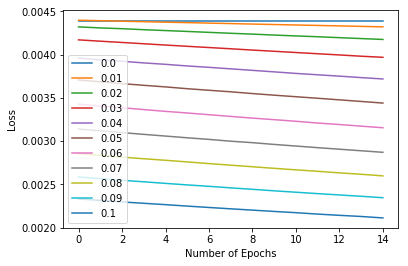

In [34]:
for lr in lst_val:
    plt.plot(val_loss[lr],label=str(lr))
    plt.legend()
    plt.xlabel("Number of Epochs")
    plt.ylabel("Loss")

In [35]:
## Increase the learning rate
lst_val1 = list(np.arange(10,20,1))
val_loss1,val_acc1 = {},{}
for learning_rate in lst_val1:
    model.compile(optimizer=optimizers.SGD(lr=learning_rate),loss='categorical_crossentropy', metrics=['accuracy'])
    history_callback = model.fit(X_train1, y_train1, epochs=15, batch_size=32)
    val_loss1[learning_rate] = history_callback.history["loss"]
    val_acc1[learning_rate] = history_callback.history["acc"]

Epoch 1/15
1527/1527 [==============================] - 1s 435us/step - loss: 3.9794 - acc: 0.7053
Epoch 2/15
1527/1527 [==============================] - 0s 64us/step - loss: 2.9176 - acc: 0.7917
Epoch 3/15
1527/1527 [==============================] - 0s 63us/step - loss: 2.7312 - acc: 0.8094
Epoch 4/15
1527/1527 [==============================] - 0s 65us/step - loss: 2.4051 - acc: 0.8376

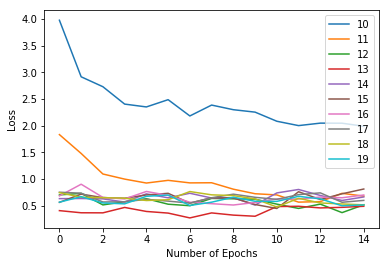

In [37]:
for lr in lst_val1:
    plt.plot(val_loss1[lr],label=str(lr))
    plt.legend()
    plt.xlabel("Number of Epochs")
    plt.ylabel("Loss")

- Utilisation d'autres outils d'optimisation : Nesterov momentum

In [38]:
#input_shape = X_train1.shape[1]
#output_shape = y_train1.shape[1]
#H = 100

model = Sequential()
model.add(Dense(H,input_dim=input_shape))
model.add(Activation('tanh'))
model.add(Dense(output_shape))
model.add(Activation('softmax'))

model.compile(optimizer=optimizers.SGD(lr=0.1, momentum=0.9, nesterov=True),loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train1, y_train1, epochs=15, batch_size=32)

Epoch 1/15
1527/1527 [==============================] - 1s 566us/step - loss: 0.3966 - acc: 0.8802
Epoch 2/15
1527/1527 [==============================] - 0s 65us/step - loss: 0.0718 - acc: 0.9797
Epoch 3/15
1527/1527 [==============================] - 0s 67us/step - loss: 0.0319 - acc: 0.9935
Epoch 4/15
1527/1527 [==============================] - 0s 63us/step - loss: 0.0201 - acc: 0.9980

In [ ]:
## Il existe d'autres algorithmes d'optimization comme Adam, Adadelta

- IMPACT OF INITIALISATION OF WEIGHTS

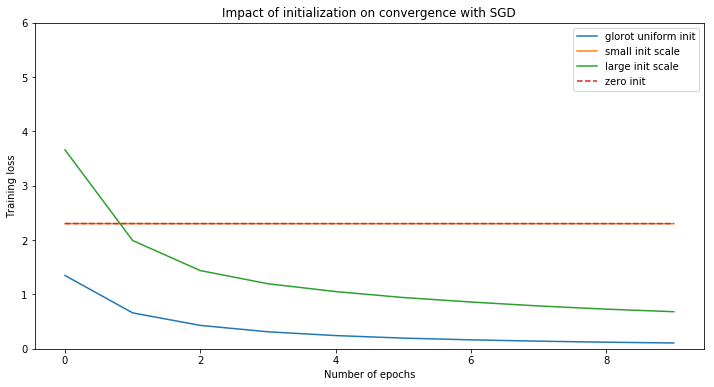

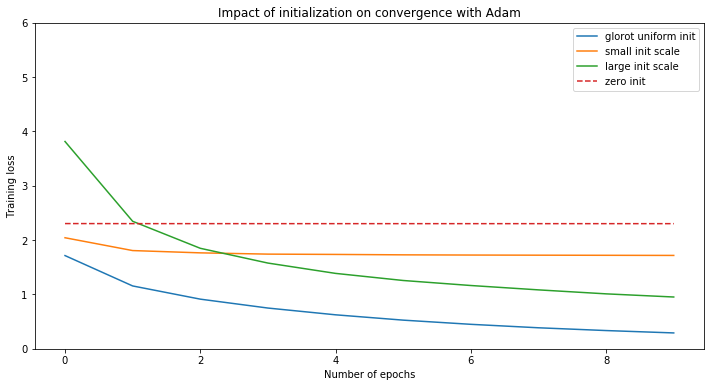

In [48]:
from keras import initializers
large_scale_init = initializers.RandomNormal(stddev=1)
small_scale_init = initializers.RandomNormal(stddev=1e-3)


optimizer_list = [
    ('SGD', optimizers.SGD(lr=0.1)),
    ('Adam', optimizers.Adam()),
#     ('SGD + Nesterov momentum', optimizers.SGD(
#             lr=0.1, momentum=0.9,nesterov=True)),
]

init_list = [
    ('glorot uniform init', 'glorot_uniform', '-'),
    ('small init scale', small_scale_init, '-'),
    ('large init scale', large_scale_init, '-'),
    ('zero init', 'zero', '--'),
]


for optimizer_name, optimizer in optimizer_list:
    plt.figure(figsize=(12, 6))
    for init_name, init, linestyle in init_list:
        model = Sequential()
        model.add(Dense(H, input_dim=input_shape, kernel_initializer=init))
        model.add(Activation("tanh"))
        model.add(Dense(output_shape, kernel_initializer=init))
        model.add(Activation("tanh"))
        model.add(Dense(output_shape, kernel_initializer=init))
        model.add(Activation("softmax"))

        model.compile(optimizer=optimizer,
                      loss='categorical_crossentropy')

        history = model.fit(X_train1, y_train1,
                            epochs=10, batch_size=32, verbose=0)
        plt.plot(history.history['loss'], linestyle=linestyle,
                 label=init_name)

    plt.xlabel('Number of epochs')
    plt.ylabel('Training loss')
    plt.ylim(0, 6)
    plt.legend(loc='best');
    plt.title('Impact of initialization on convergence with %s'
              % optimizer_name)

** GENERALISATION DU MODELE SUR LE TEST DATASET **

In [39]:
## Prediction sur le test dataset
y_pred = model.predict_classes(X_test1)

In [43]:
## Precision de la generalisation
print("Accuracy of the model on test dataset: ",round(100*np.mean(y_test==y_pred),1))

Accuracy of the model on test dataset:  97.4


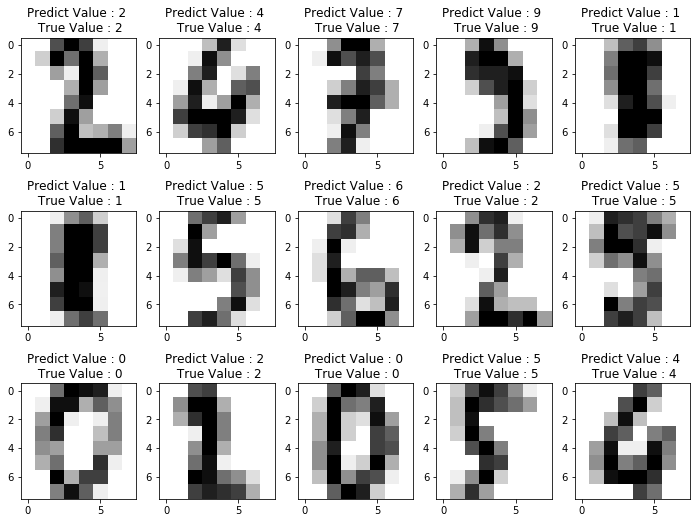

In [45]:
## Visualisation des predictions
plt.figure(figsize=(12, 9))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(scaler.inverse_transform(X_test1[i:i+1]).reshape(8,8),cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title("Predict Value : %d \n True Value : %d" % (y_pred[i],y_test[i]))